In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization
from tensorflow.keras.layers import Input, Flatten, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import cv2

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

(32, 32, 3)


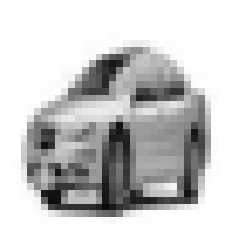

In [3]:
input_shape = x_train.shape[1:]
print(input_shape)
plt.imshow(x_train[160].astype(np.uint8))
plt.axis("off")
plt.show()

In [4]:
numberOfClass=10
y_train = to_categorical(y_train,numberOfClass)
y_test = to_categorical(y_test,numberOfClass)

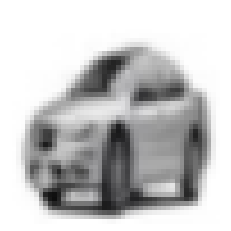

In [5]:
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage,48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array
x_train = resize_img(x_train)
x_test = resize_img(x_test)
plt.figure()
plt.imshow(x_train[160].astype(np.uint8))
plt.axis("off")
plt.show()

In [6]:
# fully connected layer is not included, weights are taken from imagenet dataset
vgg=VGG16(include_top=False,weights = "imagenet",input_shape = (48,48,3))
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [7]:
layer_list = vgg.layers

In [8]:
model = keras.Sequential()
for i in range(len(layer_list)-1):
    model.add(layer_list[i])
print(model.summary())

for layers in model.layers:
    layers.trainable = False
    
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberOfClass,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [13]:
optimizer = Adam(learning_rate=0.01,beta_1=0.9,beta_2 = 0.999)
model.compile(loss = "categorical_crossentropy",
             optimizer="SGD",
              metrics=["accuracy"])

In [14]:
hist = model.fit(x_train,y_train,validation_split=0.2,epochs=5, batch_size=500)

Epoch 1/5
80/80 [==============================] - 113s 1s/step - loss: 6.7255 - accuracy: 0.6897 - val_loss: 7.7618 - val_accuracy: 0.6108
Epoch 2/5
80/80 [==============================] - 112s 1s/step - loss: 4.3678 - accuracy: 0.7073 - val_loss: 6.8688 - val_accuracy: 0.6387
Epoch 3/5
80/80 [==============================] - 117s 1s/step - loss: 3.6679 - accuracy: 0.7107 - val_loss: 5.6507 - val_accuracy: 0.6414
Epoch 4/5
80/80 [==============================] - 114s 1s/step - loss: 3.3264 - accuracy: 0.7171 - val_loss: 6.0806 - val_accuracy: 0.6271
Epoch 5/5
80/80 [==============================] - 113s 1s/step - loss: 3.0583 - accuracy: 0.7219 - val_loss: 5.2819 - val_accuracy: 0.6437


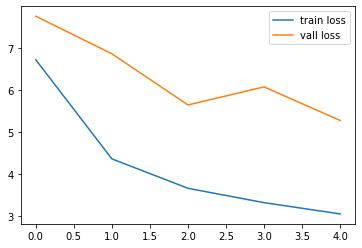

In [15]:
plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="vall loss")
plt.legend()
plt.show()


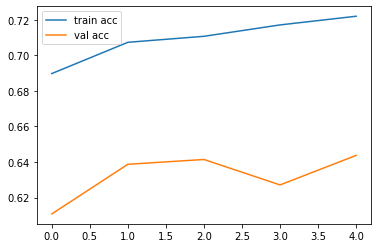

In [16]:
plt.figure()
plt.plot(hist.history["accuracy"],label="train acc")
plt.plot(hist.history["val_accuracy"],label="val acc")
plt.legend()
plt.show()